In [6]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(2, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_Indus_Fruits_2_classes_2nd_Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 250, 250, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 123, 123, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 121, 121, 128)     147584    
__________

In [7]:
resized_images_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Train'
resized_images_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test'
resized_images_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Validation'

In [8]:
batch_size=8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_train_dir,
        target_size=(256, 256),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_validation_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_test_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

Found 800 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [9]:
number_of_training_samples=800
number_of_validation_samples=80
number_of_test_samples=160

In [10]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/200
100/100 [==============================] - 49s 492ms/step - loss: 0.6528 - categorical_accuracy: 0.6825 - val_loss: 0.3563 - val_categorical_accuracy: 0.9000
Epoch 2/200
100/100 [==============================] - 35s 347ms/step - loss: 0.3427 - categorical_accuracy: 0.9038 - val_loss: 0.3136 - val_categorical_accuracy: 0.9000
Epoch 3/200
100/100 [==============================] - 35s 347ms/step - loss: 0.2587 - categorical_accuracy: 0.9313 - val_loss: 0.1258 - val_categorical_accuracy: 0.9625
Epoch 4/200
100/100 [==============================] - 35s 348ms/step - loss: 0.2650 - categorical_accuracy: 0.9163 - val_loss: 0.2083 - val_categorical_accuracy: 0.9250
Epoch 5/200
100/100 [==============================] - 35s 348ms/step - loss: 0.2232 - categorical_accuracy: 0.9325 - val_loss: 0.0915 - val_categorical_accuracy: 0.9750
Epoch 6/200
100/100 [==============================] - 35s 351ms/step - loss: 0.2320 - categorical_accuracy: 0.9250 - val_loss: 0.0979 - val_categoric

Epoch 49/200
100/100 [==============================] - 35s 354ms/step - loss: 0.0741 - categorical_accuracy: 0.9813 - val_loss: 0.1557 - val_categorical_accuracy: 0.9875
Epoch 50/200
100/100 [==============================] - 36s 355ms/step - loss: 0.1051 - categorical_accuracy: 0.9688 - val_loss: 0.0631 - val_categorical_accuracy: 0.9625
Epoch 51/200
100/100 [==============================] - 35s 354ms/step - loss: 0.0755 - categorical_accuracy: 0.9750 - val_loss: 0.0687 - val_categorical_accuracy: 0.9625
Epoch 52/200
100/100 [==============================] - 35s 353ms/step - loss: 0.1027 - categorical_accuracy: 0.9688 - val_loss: 0.0586 - val_categorical_accuracy: 0.9750
Epoch 53/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0642 - categorical_accuracy: 0.9825 - val_loss: 0.0934 - val_categorical_accuracy: 0.9750
Epoch 54/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0492 - categorical_accuracy: 0.9887 - val_loss: 0.1184 - val_cat

Epoch 97/200
100/100 [==============================] - 35s 350ms/step - loss: 0.0723 - categorical_accuracy: 0.9738 - val_loss: 0.1242 - val_categorical_accuracy: 0.9625
Epoch 98/200
100/100 [==============================] - 35s 350ms/step - loss: 0.0517 - categorical_accuracy: 0.9862 - val_loss: 0.2881 - val_categorical_accuracy: 0.9375
Epoch 99/200
100/100 [==============================] - 35s 352ms/step - loss: 0.0869 - categorical_accuracy: 0.9788 - val_loss: 0.0457 - val_categorical_accuracy: 0.9875
Epoch 100/200
100/100 [==============================] - 35s 352ms/step - loss: 0.0475 - categorical_accuracy: 0.9887 - val_loss: 0.0324 - val_categorical_accuracy: 1.0000
Epoch 101/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0399 - categorical_accuracy: 0.9912 - val_loss: 0.0184 - val_categorical_accuracy: 1.0000
Epoch 102/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0316 - categorical_accuracy: 0.9912 - val_loss: 0.0218 - val_

Epoch 145/200
100/100 [==============================] - 35s 352ms/step - loss: 0.0501 - categorical_accuracy: 0.9887 - val_loss: 0.0323 - val_categorical_accuracy: 0.9875
Epoch 146/200
100/100 [==============================] - 35s 354ms/step - loss: 0.0381 - categorical_accuracy: 0.9925 - val_loss: 0.0271 - val_categorical_accuracy: 0.9875
Epoch 147/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0418 - categorical_accuracy: 0.9925 - val_loss: 0.0306 - val_categorical_accuracy: 0.9875
Epoch 148/200
100/100 [==============================] - 35s 355ms/step - loss: 0.0607 - categorical_accuracy: 0.9775 - val_loss: 0.0682 - val_categorical_accuracy: 0.9500
Epoch 149/200
100/100 [==============================] - 35s 353ms/step - loss: 0.0493 - categorical_accuracy: 0.9862 - val_loss: 0.0255 - val_categorical_accuracy: 0.9875
Epoch 150/200
100/100 [==============================] - 35s 355ms/step - loss: 0.0389 - categorical_accuracy: 0.9875 - val_loss: 0.0259 - v

100/100 [==============================] - 35s 352ms/step - loss: 0.0376 - categorical_accuracy: 0.9912 - val_loss: 0.1617 - val_categorical_accuracy: 0.9875
Epoch 193/200
100/100 [==============================] - 35s 352ms/step - loss: 0.0258 - categorical_accuracy: 0.9938 - val_loss: 0.0132 - val_categorical_accuracy: 1.0000
Epoch 194/200
100/100 [==============================] - 35s 352ms/step - loss: 0.0154 - categorical_accuracy: 0.9963 - val_loss: 0.1432 - val_categorical_accuracy: 0.9625
Epoch 195/200
100/100 [==============================] - 35s 353ms/step - loss: 0.0520 - categorical_accuracy: 0.9862 - val_loss: 0.0321 - val_categorical_accuracy: 0.9875
Epoch 196/200
100/100 [==============================] - 35s 351ms/step - loss: 0.0194 - categorical_accuracy: 0.9938 - val_loss: 0.0110 - val_categorical_accuracy: 1.0000
Epoch 197/200
100/100 [==============================] - 35s 353ms/step - loss: 0.0167 - categorical_accuracy: 0.9975 - val_loss: 0.0089 - val_categorical

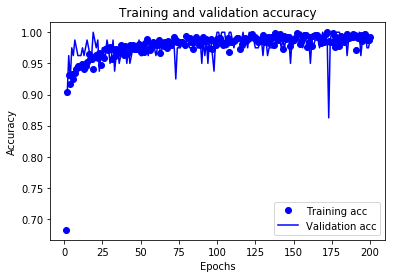

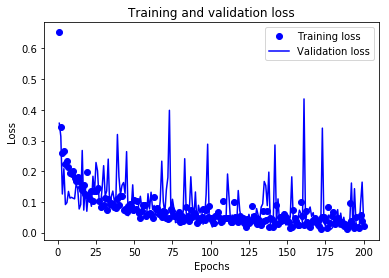

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_Indus_Fruits_2_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 2s 123ms/step - loss: 0.0958 - categorical_accuracy: 0.9875
Test-set accuracy: 98.75%
